In [1]:
from sklearn.datasets import make_regression

%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

In [2]:
X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1, random_state=2 , noise=20)

In [4]:
X

array([[-8.78107893e-01],
       [ 1.35963386e+00],
       [ 1.64027081e+00],
       [ 5.42352572e-01],
       [ 8.24703005e-01],
       [-5.96159700e-01],
       [-5.62668272e-02],
       [-1.32328898e-01],
       [-2.43476758e+00],
       [-4.03892269e-01],
       [ 3.81866234e-01],
       [ 1.36723542e+00],
       [-7.47870949e-01],
       [-3.81516482e-01],
       [ 8.42456282e-01],
       [-7.72186654e-02],
       [ 4.33496330e-01],
       [-2.17135269e-01],
       [ 1.46767801e+00],
       [ 1.12726505e-01],
       [ 1.73118467e+00],
       [-3.35677339e-01],
       [-1.09873895e+00],
       [-8.41747366e-01],
       [ 5.66275441e-01],
       [-1.05795222e+00],
       [ 6.95119605e-01],
       [ 5.39058321e-01],
       [ 5.01857207e-01],
       [-1.43943903e+00],
       [-1.89469265e-01],
       [-7.44707629e-02],
       [-1.79343559e+00],
       [ 2.23136679e+00],
       [ 4.15393930e-02],
       [ 1.17353150e+00],
       [-1.38451867e+00],
       [ 2.16116006e-01],
       [-9.1

In [3]:
X.shape

(100, 1)

<IPython.core.display.Javascript object>


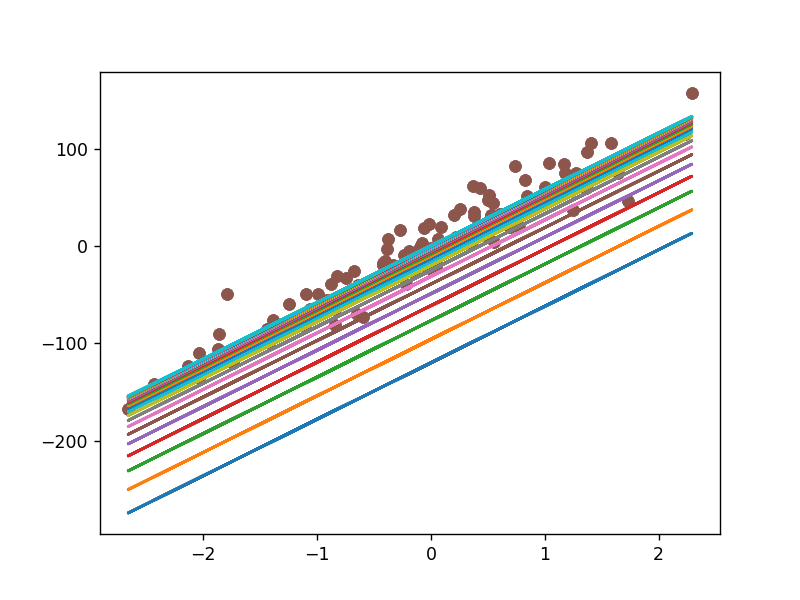

In [5]:
plt.scatter(X,y)
plt.show()

In [6]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X,y)
print(reg.coef_)
print(reg.intercept_)

[58.11865999]
0.5334392393890024


In [14]:
m = 58.11865999
b = -150 # random
lr = 0.001
epochs = 30

all_b = []
all_cost = []

for i in range(epochs):
    
    slope = 0
    cost = 0
    
    for j in range(X.shape[0]):
        
        slope = slope -2 * (y[j] - (m * X[j]) - b)
        cost = cost + (y[j] - m*X[j] - b) **2
        
    b = b - (lr * slope)
    all_b.append(b)
    all_cost.append(cost)
    y_pred = m * X + b
    plt.plot(X , y_pred)
    
plt.scatter(X , y)

# the cost value can change during each epoch because the model's parameters (slope m and intercept b)
# are being updated at the end of each epoch using gradient descent.

In [7]:
all_b = np.array(all_b).ravel()
all_b

array([-1.19893312e+02, -9.58079619e+01, -7.65396817e+01, -6.11250575e+01,
       -4.87933581e+01, -3.89279987e+01, -3.10357111e+01, -2.47218810e+01,
       -1.96708170e+01, -1.56299657e+01, -1.23972847e+01, -9.81113994e+00,
       -7.74222410e+00, -6.08709143e+00, -4.76298530e+00, -3.70370039e+00,
       -2.85627247e+00, -2.17833012e+00, -1.63597625e+00, -1.20209315e+00,
       -8.54986675e-01, -5.77301492e-01, -3.55153346e-01, -1.77434829e-01,
       -3.52600154e-02,  7.84798355e-02,  1.69471716e-01,  2.42265221e-01,
        3.00500024e-01,  3.47087867e-01])

In [8]:
all_cost = np.array(all_cost).ravel()
all_cost

array([2300942.08421047, 1485170.69636204,  963077.00813905,
        628937.04767634,  415087.4729802 ,  278223.74517467,
        190630.95937913,  134571.57646999,   98693.57140814,
         75731.64816855,   61036.01729522,   51630.81353628,
         45611.48313057,   41759.11167091,   39293.59393672,
         37715.66258685,   36705.78652293,   36059.46584202,
         35645.82060624,   35381.08765534,   35211.65856676,
         35103.22395007,   35033.82579539,   34989.41097639,
         34960.98549224,   34942.79318238,   34931.15010406,
         34923.69853395,   34918.92952907,   34915.87736595])

In [15]:
fig, ax = plt.subplots(figsize=(9,5))

x_i = np.arange(-3, 3, 0.1)
y_i = x_i*m -150
ax.scatter(X, y)
line, = ax.plot(x_i, x_i*50 - 4, 'r-', linewidth=2)

def update(i):
    label = 'epoch {0}'.format(i + 1)
    print(label)
    line.set_ydata(x_i*m + all_b[i])
    ax.set_xlabel(label)
    # return line, ax

anim = FuncAnimation(fig, update, repeat=True, frames=epochs, interval=500)

<IPython.core.display.Javascript object>


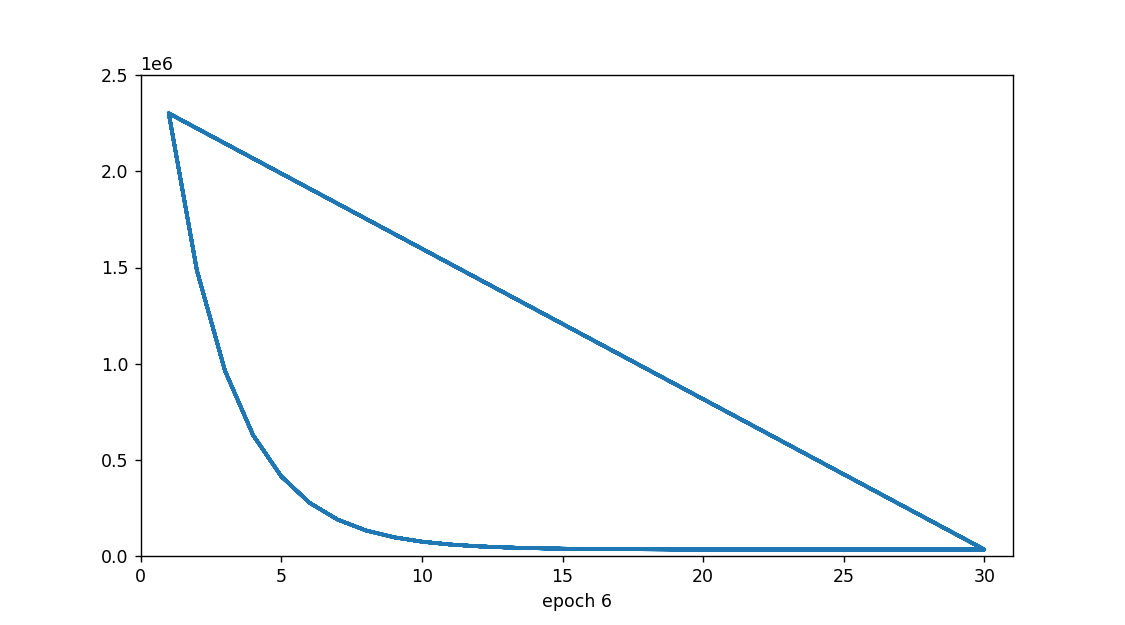

C:\Users\arups\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\animation.py:884: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


In [10]:
num_epochs = list(range(1, 31))
fig = plt.figure(figsize=(9, 5))
axis = plt.axes(xlim=(0, 31), ylim=(0, 2500000))

line, = axis.plot([], [], lw=2)

xdata, ydata = [], []


# Animation function
def animate(i):
    label = 'epoch {0}'.format(i + 1)
    xdata.append(num_epochs[i])
    ydata.append(all_cost[i])
    line.set_data(xdata, ydata)
    axis.set_xlabel(label)

    return line,


# Create the animation
anim = animation.FuncAnimation(fig, animate, frames=30, repeat=True, interval=500)

# Save the animation as a GIF
# f = r"animation1.gif"
# writergif = animation.PillowWriter(fps=2)
# anim.save(f, writer=writergif)

In [10]:
for j in range(5):
    print(j)

0
1
2
3
4
